# 1. Setup

## 1.1 Libraries

In [252]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import copy

#--- Reduce the non-necessary words
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer #convert text to matrix number
from sklearn import cluster #group keywords

## 1.2 Define Object Paper and Cluster

In [253]:
### Object Paper
from multiprocessing.resource_sharer import stop
from symbol import yield_arg
from unicodedata import name


class Paper:
    def __init__(self, name, type, material, keywords, country, year, abstract, prediction_score = None, score = 0):
        self.name = name  
        self.year = year 
        self.keywords = keywords 
        self.type = type  
        self.material = material 
        self.country = country 
        self.abstract = abstract
        self.prediction_score = None
        self.score = score
        


    def get_name(self):
        return self.name
    def get_type(self):
        return self.type
    def get_year(self):
        return self.year 
    def get_keywords(self):
        return self.keywords 
    def get_material(self):
        return self.type
    def get_country(self):
        return self.country
    def get_abstract(self):
        return self.abstract
    def get_score(self):
        return self.score

    def set_keywords(self, keywords):
        self.keywords = keywords
    def set_prediction_score(self, score):
        self.prediction_score = score
    def set_score(self,score):
        self.score = score

class Cluster_group():
    def __init__(self, list_paper, ntop =6, score = 0, name = None):
        self.list_paper = list_paper
        self.name = name 
        self.list_keywords = []
        self.ntop = ntop
        self.score = score
        
    def get_list_paper(self):
        return self.list_paper
    def get_list_keywords(self):
        return self.list_keywords
    def get_npapers(self):
        return len(self.list_paper)
    def get_score(self):
        return(self.score)

    def set_score(self, score):
        self.score = score
        

    def get_tops_keyword(self):
        
        def tokenizer(keyword):
            stemmer = PorterStemmer()
            #normalize words of string into a list and into its natural roof
            return [stemmer.stem(w) for w in keyword.split(' ')]

        for paper in self.list_paper:
            self.list_keywords += (tokenizer(paper.get_keywords()))

        #--- Stopword analysis
        stop_words = stopwords.words('english')
        stop_words.append("digital")
        stop_words.append("twin")
        stop_words.append("digit")
        

        copy_list_keywords = copy.deepcopy(self.list_keywords)

        for i in range(len(copy_list_keywords)):
            for j in range(len(stop_words)):

                if copy_list_keywords[i] == stop_words[j]:
                    self.list_keywords.remove(stop_words[j])                    
        
        df = pd.value_counts(np.array(self.list_keywords))

        if len(df) < self.ntop:
            for i in range(len(df)):
                print("Index: ", df.index[i], "| Frequency: ", df.values[i])
        else:
            for i in range(self.ntop):
                print("Index: ", df.index[i], "| Frequency: ", df.values[i])


## 1.3 Import CSV and create paper objects

In [254]:
papers_list = []

# Trying with CSV from Python and not Pandas
with open("State of Art .csv", encoding='utf-8') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',') #object in the memory
    row_counter = 0

    #iterate for each row of the CSV file
    for row in csv_reader:
        if row_counter != 0:
            new_paper = Paper(row[0], row[1], row[2], row[4], row[5], row[6], row[7])
            papers_list.append(new_paper)

        row_counter += 1


## 1.4 Cleaning the Data

In [255]:
#-- Loop for each paper
for paper in papers_list:
    #-- Loop for each string in keyword
    keyword_list = list(paper.get_keywords())
    for i in range(len(keyword_list)):
        if keyword_list[i] == ',':
            keyword_list[i] = ''
    
    paper.set_keywords(''.join(keyword_list))
    

## 1.5 Setup of Stemmer, Tokenizer, Stop-words

### 1.5.1 Define Stemmer and Stop-words

In [256]:
stemmer = PorterStemmer()
stop_words = stopwords.words('english')
stop_words.append("digital")
stop_words.append("twin")
stop_words.append("digit")


In [257]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### 1.5.2 Define Tokenizer

In [258]:
def tokenizer(keyword):
    #normalize words of string into a list and into its natural roof
    return [stemmer.stem(w) for w in keyword.split(' ')]

In [260]:
print(tokenizer(papers_list[100].get_keywords()))

['artifici', 'intellig', 'tool', 'art', 'comput', 'autoencod', 'data', 'driven', 'techniqu', 'data', 'handl', 'deep', 'learn', 'digit', 'twin', 'iiot', 'industri', 'internet', 'of', 'thing', '(iiot)', 'input', 'output', 'program', 'life', 'cycl', 'long', 'short-term', 'memori', 'long-short', 'term', 'memori', 'maintain', 'multilay', 'neural', 'network', 'multilay', 'neural', 'network', 'probabilist', 'simul', 'prognost', 'rul', 'estim', 'recurr', 'neural', 'network', '(rnn)', 'remain', 'use', 'live', 'sensor', 'data', 'collect', 'simultan', 'monitor', 'time', 'seri']


# 2. Clustering

## 2.1 Vectorizer Data

In [261]:
#Get all the keywords in put it into a new list
papers_keywords_list = []
for i in range(len(papers_list)):
    papers_keywords_list.append(papers_list[i].get_keywords())


### Without stop-words

In [131]:
#Create the object vectorizer
tfidf = TfidfVectorizer(use_idf=False, norm=None)

In [28]:
#Count the number of times that a keywords appears in one article-keyword
data_vectorized = tfidf.fit_transform(papers_keywords_list).toarray()


In [29]:
#Transform the array into a dataframe to export as CSV file
data_frame = pd.DataFrame(data_vectorized, index=papers_keywords_list, columns =tfidf.get_feature_names() )
data_frame.to_csv("data_vectorized.csv")


c:\Users\pedro\.virtualenvs\virtenv-sPQTmXGI\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [30]:
print(data_frame)

                                                    1451   19  23247   3d  \
Digital twin monitoring                              0.0  0.0    0.0  0.0   
Digital twin Healthcare monitoring                   0.0  0.0    0.0  0.0   
Digital twin Hybrid Analysis and Modeling Machi...   0.0  0.0    0.0  0.0   
Digital twin MTconnect cyberphysical cloud manu...   0.0  0.0    0.0  0.0   
Digital twin data-model fusion reduced-order model   0.0  0.0    0.0  0.0   
...                                                  ...  ...    ...  ...   
Big data Data handling Data mining Data mining ...   0.0  0.0    0.0  0.0   
Active automata learning Active automaton learn...   0.0  0.0    0.0  0.0   
Application examples Batch data processing Batc...   0.0  0.0    0.0  0.0   
3D modeling Classification (of information) Cla...   0.0  0.0    0.0  1.0   
Agent based modeling Agent-based model Artifici...   0.0  0.0    0.0  0.0   

                                                     4g   5g  abilities  \


### With stop-words

In [262]:
tfidf_simpler = TfidfVectorizer(tokenizer=tokenizer, stop_words=stop_words)
data_vectorized_simpler = tfidf_simpler.fit_transform(papers_keywords_list).toarray()
X_data_frame = pd.DataFrame(data_vectorized_simpler, index=papers_keywords_list, columns=tfidf_simpler.get_feature_names())


c:\Users\pedro\.virtualenvs\virtenv-sPQTmXGI\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', "it'", 'onc', 'onli', 'ourselv', "she'", "should'v", 'themselv', 'thi', 'veri', 'wa', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  warnings.warn(
c:\Users\pedro\.virtualenvs\virtenv-sPQTmXGI\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [263]:
print(tfidf_simpler.get_feature_names())

['', '%', '&', "'current", '(ai)', '(bpr)', '(coap)', '(comput', '(cpcm)', '(cps)', '(cpss)', '(dmu)', '(dss)', '(dt)', '(dtme)', '(dts)', '(eecm)', '(electronic)', '(friction)', '(iiot)', '(iot)', '(languages)', '(mas)', '(mbse)', '(mda)', '(of', '(osp)', '(phil)', '(plc)', '(plm)', '(rami', '(rfid)', '(rms)', '(rnn)', '(sdn)', '(sfdts)', '(soa)', '(uhf', '1451', '23247', '3d', '3d-print', '4.0', '4.0)', '4g', '5g', 'abil', 'absorpt', 'academ', 'acceler', 'accid', 'accur', 'acquisit', 'action', 'action-ori', 'activ', 'adapt', 'addit', 'adhes', 'administr', 'adopt', 'adult', 'advanc', 'advantag', 'aec', 'aeroengin', 'aerospac', 'after-sal', 'age', 'agent', 'agent-bas', 'agil', 'agricultur', 'agv', 'aid', 'air', 'aircraft', 'alarm', 'alert', 'algebra', 'algorithm', 'alloc', 'amount', 'analysi', 'analyt', 'annual', 'anomali', 'applianc', 'applic', 'application-driven', 'application-ori', 'approach', 'arc', 'architect', 'architectur', 'area', 'arriv', 'art', 'arti', 'artichitectur', 'arti

c:\Users\pedro\.virtualenvs\virtenv-sPQTmXGI\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [264]:
print(data_vectorized_simpler)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [265]:
print(X_data_frame)

                                                           %    &  'current  \
Digital twin monitoring                             0.0  0.0  0.0       0.0   
Digital twin Healthcare monitoring                  0.0  0.0  0.0       0.0   
Digital twin Hybrid Analysis and Modeling Machi...  0.0  0.0  0.0       0.0   
Digital twin MTconnect cyberphysical cloud manu...  0.0  0.0  0.0       0.0   
Digital twin data-model fusion reduced-order model  0.0  0.0  0.0       0.0   
...                                                 ...  ...  ...       ...   
Big data Data handling Data mining Data mining ...  0.0  0.0  0.0       0.0   
Active automata learning Active automaton learn...  0.0  0.0  0.0       0.0   
Application examples Batch data processing Batc...  0.0  0.0  0.0       0.0   
3D modeling Classification (of information) Cla...  0.0  0.0  0.0       0.0   
Agent based modeling Agent-based model Artifici...  0.0  0.0  0.0       0.0   

                                                   

## 2.2 Clustering 

In [266]:
clustering = cluster.AffinityPropagation()

Create the prediction and assigning a "serial number" of cluster to each paper

In [267]:
clustering_prediction = clustering.fit_predict(X_data_frame)
print(clustering_prediction)

[ 8  1  5  7  1  2 10  0  1 16  9  2 11  0  3 11  1  5  2  3  4 11 11  5
  1 12 11 12  6 12  7  8  9 10 18 10  2  1  5  1  4  8  1  6 11 14  2 12
 14  4 12 30  9 11  4  2 12  1 12  3 12 12 18 11 18 13 13  8 14 11 18 18
  1  2  1  9  1 15  2  9 43  1  6 16  9  9  9  7  2  8 23  7  1  8  1  4
  4 17  2 10  8  2  6  2  6  8  6  9 18  1  6  6 22  9 18 10  4  1  8 10
  3  2  9  2  6  9  4  9  6  8  1  7  6  1  7  4  9 10  9  4 10  8  1  9
  2  1 12  7  4  6  4  2  2  4 10  6  1  7  2 10  8  2  7 19  1  2  4 25
 20  1  1  6  4  1  4  6  6 10  2  2 10 10 10  1  2 21 48  4  7  1  9  4
 10  2  5  2  7  1 17  1  1  7  2  6 46  6  4 45 10  8  1 22  2  6 15  1
  7 23 10  7 10  1  7  4  9 10 10 18  4  8  1  6  8  9 29  2 10  8  9  6
  2  6  9  1 10  1  9  8  2 10  1  2  6  2  9 24  2  2  8 10 25 10 30  4
  9 20  2  4 10 21  9  7  1 10 28  7 26  1  2 45 34  1  4 46 10  4  1  4
  8  7  2 10 10  9  2 29  6  6  7 27  6  1 28  2  9  2 16  2 24  9  2  6
  1 29  7  6  6 10 10  4  1  7  7  1  7  6 10  6 30

In [268]:
X_data_frame['prediction'] = clustering.fit_predict(X_data_frame)
X_data_frame.to_csv("data_vectorized_simpler.csv")

c:\Users\pedro\.virtualenvs\virtenv-sPQTmXGI\lib\site-packages\sklearn\cluster\_affinity_propagation.py:236: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


In [269]:
print("Number of clusters = ", clustering_prediction.max())

Number of clusters =  55


Give the score ("serial number") for each paper object

In [270]:
for i in range(len(clustering_prediction)):
    for paper in papers_list:
        paper.set_prediction_score(clustering_prediction[i])


### 2.2.1 Creating cluster objects

In [271]:
#-- Creating cluster objects
cluster_list = []
for nclusters in range(len(clustering_prediction)):
    similar_papers_list = []
    for i in range(len(clustering_prediction)):
        if clustering_prediction[i] == nclusters:
            similar_papers_list.append(papers_list[i])
    cluster_list.append(Cluster_group(similar_papers_list))

Show the most relevant keywords for each cluster

In [272]:
X_serial_number = []
Y_number_papers = []
for nclusters in range(len(cluster_list)):
    if cluster_list[nclusters].get_npapers() != 0:
        X_serial_number.append(nclusters)
        Y_number_papers.append(cluster_list[nclusters].get_npapers())

        print("============================")
        print("Serial Number = ", nclusters)
        print("--- Number of papers = ", cluster_list[nclusters].get_npapers())
        print()
        cluster_list[nclusters].get_tops_keyword()
        print("============================")
        print()

Serial Number =  0
--- Number of papers =  2

Index:  applic | Frequency:  2
Index:  techniqu | Frequency:  2
Index:  & | Frequency:  2
Index:  concept | Frequency:  2

Serial Number =  1
--- Number of papers =  50

Index:  system | Frequency:  53
Index:  manufactur | Frequency:  46
Index:  industri | Frequency:  30
Index:  data | Frequency:  28
Index:  product | Frequency:  26
Index:  simul | Frequency:  25

Serial Number =  2
--- Number of papers =  46

Index:  system | Frequency:  58
Index:  product | Frequency:  37
Index:  manufactur | Frequency:  30
Index:  industri | Frequency:  19
Index:  control | Frequency:  18
Index:  simul | Frequency:  18

Serial Number =  3
--- Number of papers =  4

Index:  product | Frequency:  5
Index:  life | Frequency:  5
Index:  cycl | Frequency:  5
Index:  model | Frequency:  2
Index:  solut | Frequency:  1
Index:  paa | Frequency:  1

Serial Number =  4
--- Number of papers =  28

Index:  system | Frequency:  43
Index:  industri | Frequency:  25
In

Show the number of papers per cluster

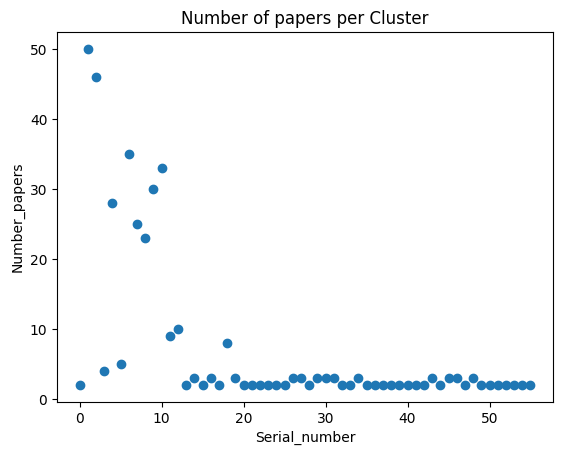

In [273]:
plt.scatter(X_serial_number, Y_number_papers)
plt.title("Number of papers per Cluster")
plt.xlabel("Serial_number")
plt.ylabel("Number_papers")
plt.show()

# 3. Targeting

## 3.1 Choose required keywords and Thresholders

In [274]:
selected_clusters = []
threshold = 0.2
required_keywords = "shop floor forecasting model generation process mining sustainability architecture framework discrete event simulation manufacturing production"
required_keywords_roots = tokenizer(required_keywords)

print(required_keywords_roots)

['shop', 'floor', 'forecast', 'model', 'gener', 'process', 'mine', 'sustain', 'architectur', 'framework', 'discret', 'event', 'simul', 'manufactur', 'product']


## 3.2 Assign a score for each cluster

In [275]:
Y_score = []
Y_counter = []

for clusters in cluster_list:
    clusters_keyword = clusters.get_list_keywords()
    if len(clusters_keyword) != 0:
        counter = 0
        for key in clusters_keyword:
            for required_key in required_keywords_roots:
                if key == required_key:
                    counter+=1
        score = counter / len(clusters_keyword)
        clusters.set_score(score)
        
        if score == 1:
            score = 0

        Y_score.append(score)
        Y_counter.append(counter)


        # print("score: ", score)
        # print("counter: ", counter)
        # print("N Keywords: ", len(clusters_keyword))
        # print("=====")

Show the score of each cluster

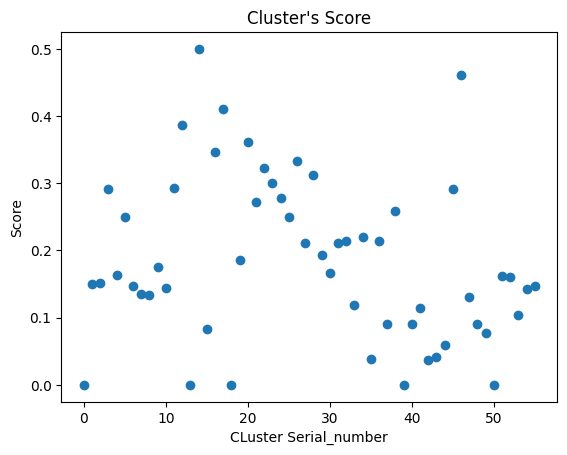

In [276]:
plt.scatter(X_serial_number, Y_score)
plt.title("Cluster's Score")
plt.xlabel("CLuster Serial_number")
plt.ylabel("Score")
plt.show()

Show the counter for each cluster

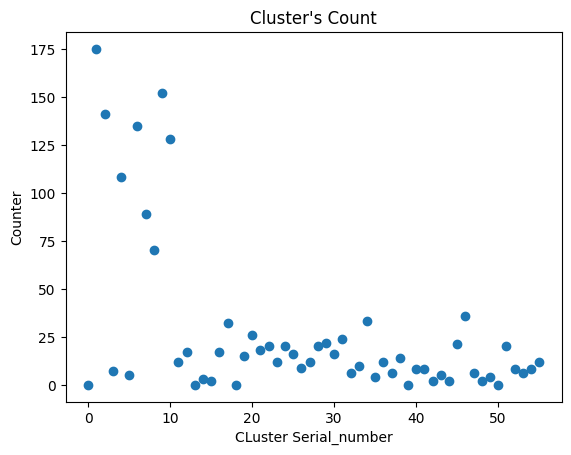

In [277]:
plt.scatter(X_serial_number, Y_counter)
plt.title("Cluster's Count")
plt.xlabel("CLuster Serial_number")
plt.ylabel("Counter")
plt.show()

## 3.3 Select Clusters

### What cluster should we care about?

In [279]:
selected_clusters = []
threshold = 0.25

for clusters in cluster_list:
    if clusters.get_score() >= threshold:
        selected_clusters.append(clusters)


Show the papers within the selected Clusters and its keywords

In [281]:
print("=================")
print("Number of selected Cluster: ", len(selected_clusters))
print("=================")


for i in range(len(selected_clusters)):
    print("-------------------------------")
    print("number papers = ", selected_clusters[i].get_npapers())
    print("Cluster score = ", selected_clusters[i].get_score())
    for j in range(selected_clusters[i].get_npapers()):
        print("- ",selected_clusters[i].get_list_paper()[j].get_name())
    
        print("keywords = ",selected_clusters[i].get_list_paper()[j].get_keywords() )


Number of selected Cluster:  18
-------------------------------
number papers =  4
Cluster score =  0.2916666666666667
-  Altair
keywords =  Digital twin IT solutions PaaS Product life cycle
-  Siemens
keywords =  Digital twin Product life cycle
-  Life Cycle of a Digital Resource Twin: Meta-Modeling and Application Example
keywords =  Digital twin Modeling Product life cycle
-  How digital twins overcome enterprise boundaries: A contribution to the design of digital twins with applications across enterprises in the product life cycle [Wie Digitale Zwillinge Unternehmensgrenzen überwinden]
keywords =  Business models Digital twin Life cycle Organizational boundaries Product design Product life cycles S values
-------------------------------
number papers =  5
Cluster score =  0.25
-  Digital Twin: Values, Challenges and Enablers From a Modeling Perspective
keywords =  Digital twin Hybrid Analysis and Modeling Machine learning
-  General Electric
keywords =  Digital twin Machine learnin

## 3.3 Select Papers

#### What paper within the selected cluster should we care about?

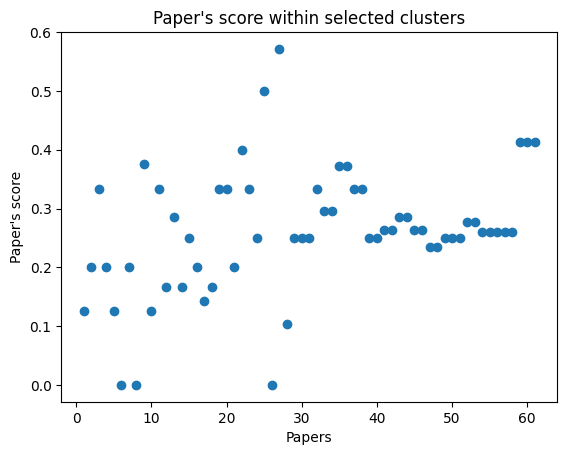

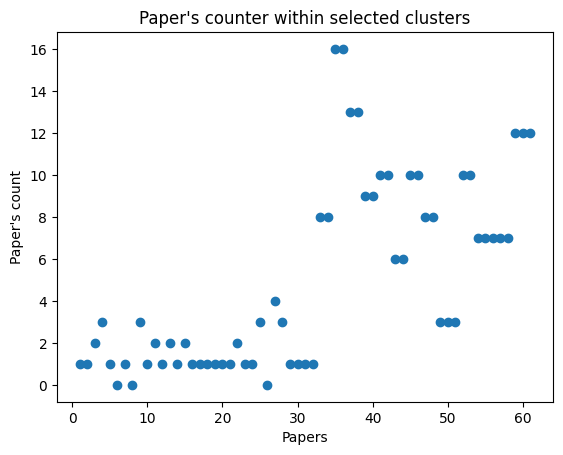

In [282]:
threshhold_paper = 0.39
Y_score_paper = []
Y_count_paper = []
X_selected_paper = []
selected_paper = []
npaper = 0
for clusters in selected_clusters:
    for paper in clusters.get_list_paper():
        npaper += 1
        paper_keywords = (tokenizer(paper.get_keywords()))
        counter_paper = 0
        for key in paper_keywords:
            for required_key in required_keywords_roots:
                    if key == required_key:
                        counter_paper+=1
        score_paper = counter_paper / len(paper_keywords)
        paper.set_score(score_paper)

        Y_score_paper.append(score_paper)
        Y_count_paper.append(counter_paper)
        X_selected_paper.append(npaper)

        if score_paper >= threshhold_paper:
            selected_paper.append(paper)

        
plt.scatter(X_selected_paper, Y_score_paper)
plt.title("Paper's score within selected clusters")
plt.xlabel("Papers")
plt.ylabel("Paper's score")
plt.show()

plt.scatter(X_selected_paper, Y_count_paper)
plt.title("Paper's counter within selected clusters")
plt.xlabel("Papers")
plt.ylabel("Paper's count")
plt.show()


Show selected papers

In [283]:
print("Number of selected papers: ", len(selected_paper))
for paper in selected_paper:
    print("----")
    print("Paper Title: ", paper.get_name())

    

Number of selected papers:  6
----
Paper Title:  Digital Twins-based Application Development for Digital Manufacturing
----
Paper Title:  Automated Model Transformation in modeling  Twins of Industrial Internet-of-Things Applications utilizing AutomationML
----
Paper Title:  Real-time combination of material flow simulation, digital twins of manufacturing cells, an AGV and a mixed-reality application
----
Paper Title:  Automated digital twins generation for manufacturing systems: A case study
----
Paper Title:  Automated digital twins generation for manufacturing systems: A case study
----
Paper Title:  Automated digital twins generation for manufacturing systems: A case study
